In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
all_data = pd.read_csv("../data/filtered_data_IEDB_4_tested_len_9_10_full_HLA_IFNg_assay_w_parts.csv")
all_data

,Unnamed: 0,peptide,HLA_allele,potential,tested_subjects,positive_subjects,immunogenicity,parts,binding_score
0,0,AAGIGILTV,HLA-A*02:01,0.833333,4,4,Positive,6,6
1,1,AALFFFDID,HLA-A*02:01,0.250000,10,2,Positive,2,2
2,2,AAVKAGAAL,HLA-B*07:02,0.750000,2,2,Positive,0,0
3,3,ADVEFCLSL,HLA-B*44:03,0.500000,6,3,Positive,8,8
4,4,AELEGVWQPA,HLA-B*40:06,0.666667,1,1,Positive,9,9
...,...,...,...,...,...,...,...,...,...
5538,5538,FTGSEVENV,HLA-A*02:01,0.083333,10,0,Negative,1,1
5539,5539,FTSHEHFGL,HLA-A*02:01,0.083333,10,0,Negative,9,9
5540,5540,MQVIGDQYV,HLA-A*02:01,0.083333,10,0,Negative,3,3
5541,5541,SQEPMSIYV,HLA-A*02:01,0.083333,10,0,Negative,0,0


<function matplotlib.pyplot.show(close=None, block=None)>

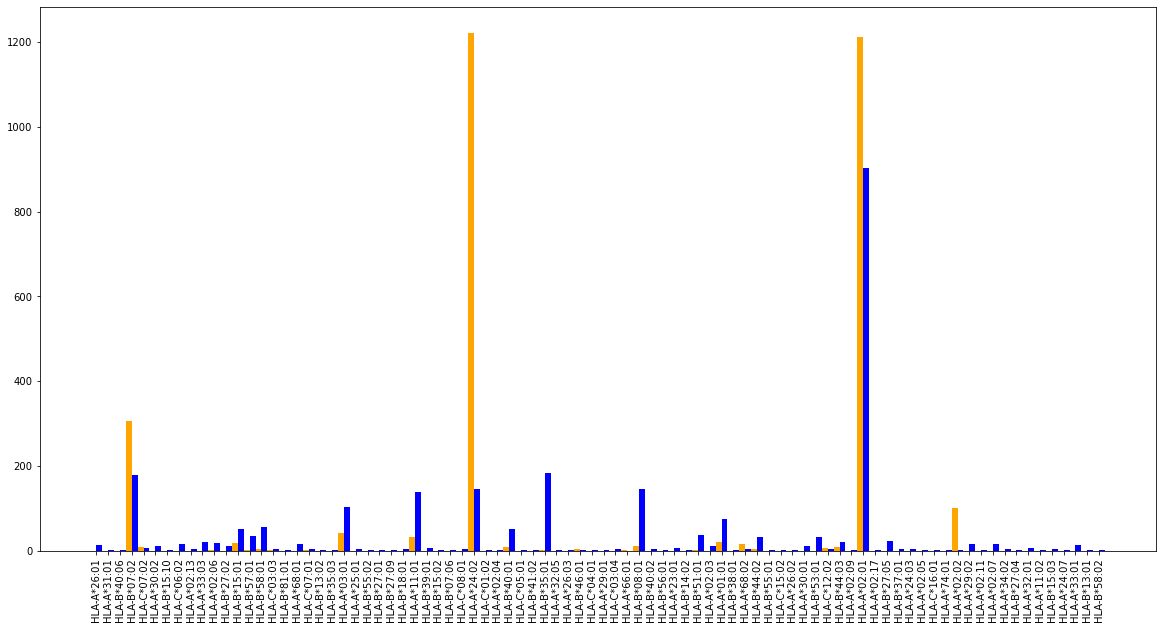

In [45]:
fig = plt.figure(figsize=(20,10))
unique_HLAS = list(set(all_data["HLA_allele"]))

for i,HLA in enumerate(unique_HLAS):
    immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Positive")])
    non_immunogenic_subjects = len(all_data[(all_data["HLA_allele"] == HLA) & (all_data["immunogenicity"] == "Negative")])
    plt.bar(i + 0.25,immunogenic_subjects,color='blue', width=0.5)
    plt.bar(i - 0.25,non_immunogenic_subjects,color='orange', width=0.5)

plt.xticks(np.arange(len(unique_HLAS)),unique_HLAS,rotation=90)
plt.show

{'HLA-A*01:01',
 'HLA-A*02:01',
 'HLA-A*02:02',
 'HLA-A*02:03',
 'HLA-A*02:04',
 'HLA-A*02:05',
 'HLA-A*02:06',
 'HLA-A*02:07',
 'HLA-A*02:09',
 'HLA-A*02:11',
 'HLA-A*02:13',
 'HLA-A*02:17',
 'HLA-A*03:01',
 'HLA-A*11:01',
 'HLA-A*11:02',
 'HLA-A*23:01',
 'HLA-A*24:02',
 'HLA-A*24:03',
 'HLA-A*24:07',
 'HLA-A*25:01',
 'HLA-A*26:01',
 'HLA-A*26:02',
 'HLA-A*26:03',
 'HLA-A*29:01',
 'HLA-A*29:02',
 'HLA-A*30:01',
 'HLA-A*30:02',
 'HLA-A*31:01',
 'HLA-A*32:01',
 'HLA-A*32:05',
 'HLA-A*33:01',
 'HLA-A*33:03',
 'HLA-A*34:02',
 'HLA-A*66:01',
 'HLA-A*68:01',
 'HLA-A*68:02',
 'HLA-A*74:01',
 'HLA-B*07:02',
 'HLA-B*07:06',
 'HLA-B*08:01',
 'HLA-B*13:01',
 'HLA-B*13:02',
 'HLA-B*14:02',
 'HLA-B*15:01',
 'HLA-B*15:02',
 'HLA-B*15:03',
 'HLA-B*15:10',
 'HLA-B*18:01',
 'HLA-B*27:01',
 'HLA-B*27:02',
 'HLA-B*27:04',
 'HLA-B*27:05',
 'HLA-B*27:09',
 'HLA-B*35:01',
 'HLA-B*35:03',
 'HLA-B*37:01',
 'HLA-B*38:01',
 'HLA-B*39:01',
 'HLA-B*40:01',
 'HLA-B*40:02',
 'HLA-B*40:06',
 'HLA-B*41:02',
 'HLA-B*

In [24]:
fig = plt.figure(figsize=(20,10))
sns.barplot(x="HLA_allele", y="immunogenicity", data=all_data)
plt.xticks(rotation=90)
plt.show()

TypeError: Neither the `x` nor `y` variable appears to be numeric.

<Figure size 1440x720 with 0 Axes>